# Macro research topic 1
## Quantifying geopolitical uncertainty that isn’t yet reflected in the markets


### Introduction

-  The world is currently experiencing more conflicts than at any time since the post-9/11 Iraq war.
-  I believe the risk of nuclear war is at its highest level since the Cold War.
-  Despite these risks, the S&P 500 keeps reaching new highs, driven by the ChatGPT initiated tech boom.
-  Markets seem aware of war risks, as shown by Bitcoin's quick drop when Iran attacked Israel with war drones. S&P 500 did not reflect this drop as it was a Sunday.
-  This leads me to believe that that markets believe AI's economic benefits outweigh the potential negative impacts of war.
-  This study aims to:
  1. Measure the positive effects of AI and negative effects of war on the economy
  2. Analyze how these 2 factors are currently priced into markets
  3. Compare the current situations with the 2000 tech boom and Cold War era to identify possible future scenarios.

### DOWNLOAD DATA

In [1]:
import pandas as pd
from yahooquery import Ticker
from fredapi import Fred
import os
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# Initialize Yahoo Finance and FRED tickers
yahoo_tickers = {
    # Equity Indices
    "^GSPC": "S&P 500",
    "^N225": "Nikkei 225",
    "^FTSE": "FTSE 100",
    "^HSI": "Hang Seng Index",

    # Fixed Income
    "^TNX": "10-Year Treasury Yield",
    "^TYX": "30-Year Treasury Yield",
    "^FVX": "5-Year Treasury Yield",
    "^IRX": "13-Week Treasury Bill Yield",

    # Volatility
    "^VIX": "CBOE Volatility Index",
}

fred_series = {
    # Growth and Employment
    'GDP': 'Gross Domestic Product',
    'UNRATE': 'Unemployment Rate',
    'INDPRO': 'Industrial Production',
    'PAYEMS': 'Nonfarm Payrolls',
    'CIVPART': 'Labor Force Participation Rate',

    # Inflation and Prices
    'CPIAUCSL': 'Consumer Price Index',
    'PPIACO': 'Producer Price Index',
    'PCEPILFE': 'Core PCE Price Index',

    # Trade and Globalization
    'BOPGSTB': 'Trade Balance',
    'DTWEXBGS': 'US Dollar Index',

    # Financial Conditions
    'FEDFUNDS': 'Federal Funds Rate',
    'T10Y2Y': '10-Year Treasury Minus 2-Year Treasury Spread',
    'BAA10Y': 'Moody’s BAA Corporate Bond Yield Spread',
    'STLFSI': 'St. Louis Fed Financial Stress Index',
    
    # Liquidity Indicators
    'WALCL': 'Federal Reserve Balance Sheet',
    'M2SL': 'M2 Money Stock',
    'RRPONTSYD': 'Overnight Reverse Repo Agreements',
    'TOTALSL': 'Total Assets, Liquidity Facilities',
    'DFF': 'Effective Federal Funds Rate'
}

# Initialize data containers
yahoo_data = {}
fred_data = {}

# Fetch data from Yahoo Finance
for ticker, name in yahoo_tickers.items():
    try:
        data = Ticker(ticker)
        history = data.history(period="max")
        if not history.empty:  # Ensure data exists for the ticker
            history['Ticker'] = ticker
            history['Name'] = name
            yahoo_data[ticker] = history
            print(f"Fetched data for {name} ({ticker})")
        else:
            print(f"No data for {name} ({ticker})")
            
    except Exception as e:
        print(f"Error fetching data for {name} ({ticker}): {e}")

# Fetch data from FRED API (ensure you replace the API key with your own)
fred_api_key = os.getenv('FRED_API_KEY')  # Replace with your FRED API key or set it as an environment variable
fred = Fred(api_key=fred_api_key)

for series_id, series_name in fred_series.items():
    try:
        series_data = fred.get_series(series_id)
        if series_data is not None and not series_data.empty:  # Ensure data exists for the series
            series_df = pd.DataFrame(series_data, columns=['Value'])
            series_df['Ticker'] = series_id
            series_df['Name'] = series_name
            fred_data[series_id] = series_df
            print(f"Fetched data for {series_name} ({series_id})")
        else:
            print(f"No data for {series_name} ({series_id})")
            
    except Exception as e:
        print(f"Error fetching data for {series_name} ({series_id}): {e}")


Fetched data for S&P 500 (^GSPC)
Fetched data for Nikkei 225 (^N225)
Fetched data for FTSE 100 (^FTSE)
Fetched data for Hang Seng Index (^HSI)
Fetched data for 10-Year Treasury Yield (^TNX)
Fetched data for 30-Year Treasury Yield (^TYX)
Fetched data for 5-Year Treasury Yield (^FVX)
Fetched data for 13-Week Treasury Bill Yield (^IRX)
Fetched data for CBOE Volatility Index (^VIX)
Fetched data for Gross Domestic Product (GDP)
Fetched data for Unemployment Rate (UNRATE)
Fetched data for Industrial Production (INDPRO)
Fetched data for Nonfarm Payrolls (PAYEMS)
Fetched data for Labor Force Participation Rate (CIVPART)
Fetched data for Consumer Price Index (CPIAUCSL)
Fetched data for Producer Price Index (PPIACO)
Fetched data for Core PCE Price Index (PCEPILFE)
Fetched data for Trade Balance (BOPGSTB)
Fetched data for US Dollar Index (DTWEXBGS)
Fetched data for Federal Funds Rate (FEDFUNDS)
Fetched data for 10-Year Treasury Minus 2-Year Treasury Spread (T10Y2Y)
Fetched data for Moody’s BAA Co

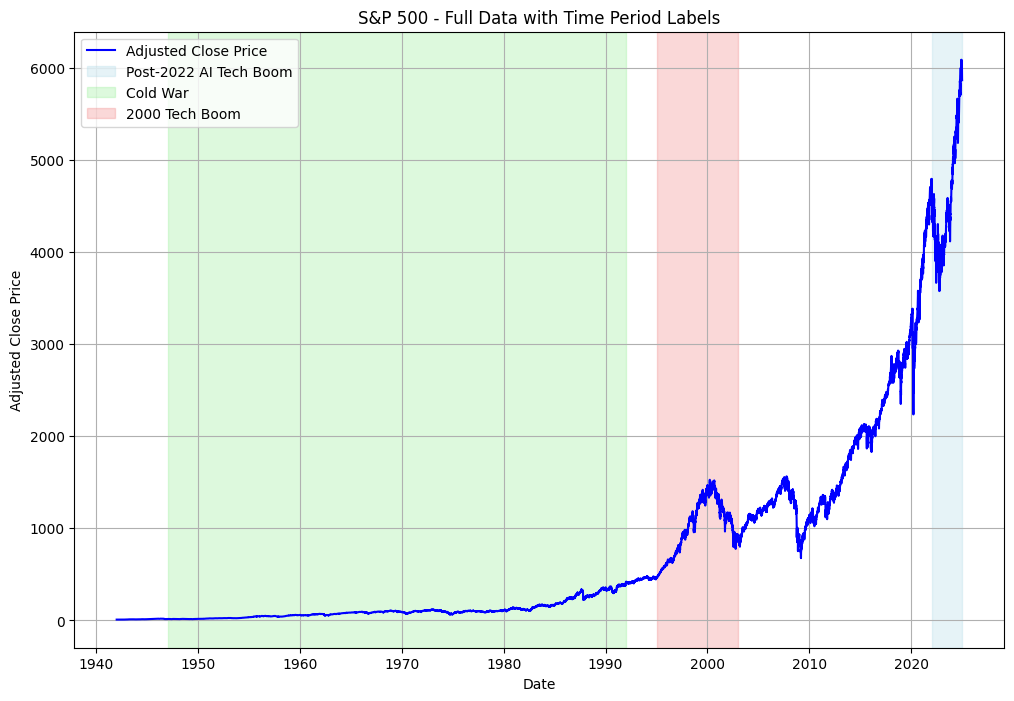

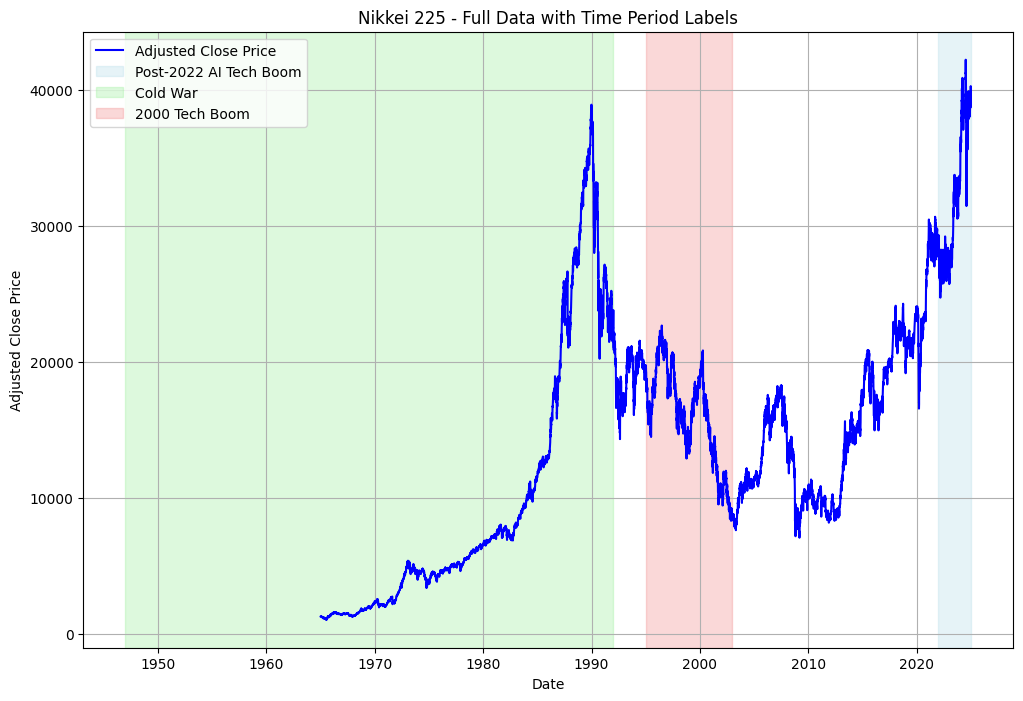

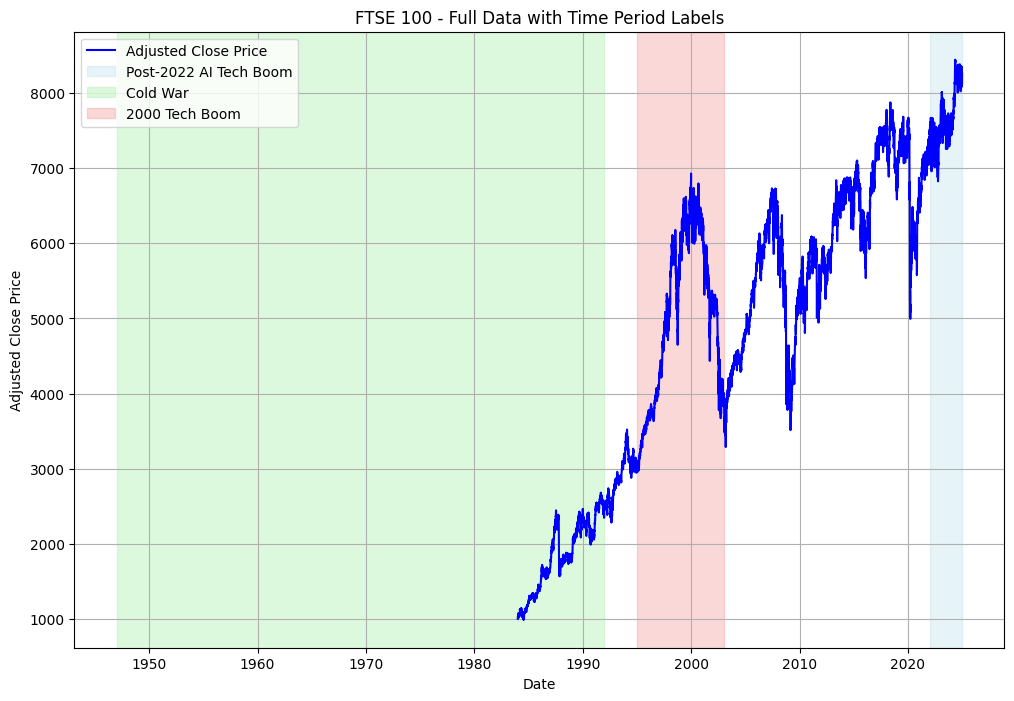

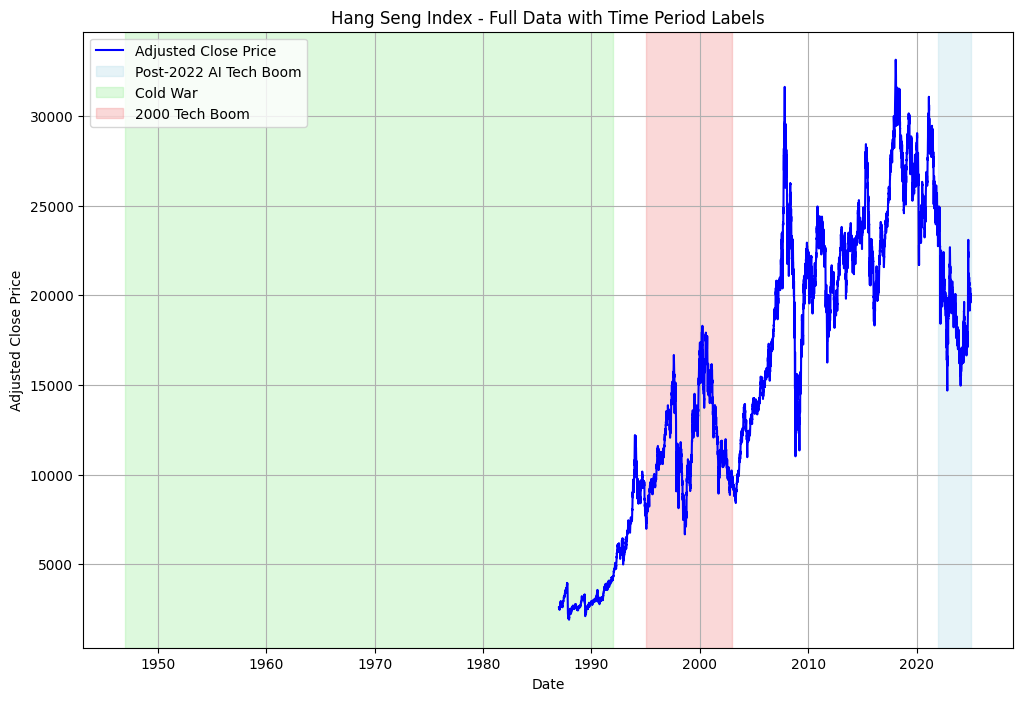

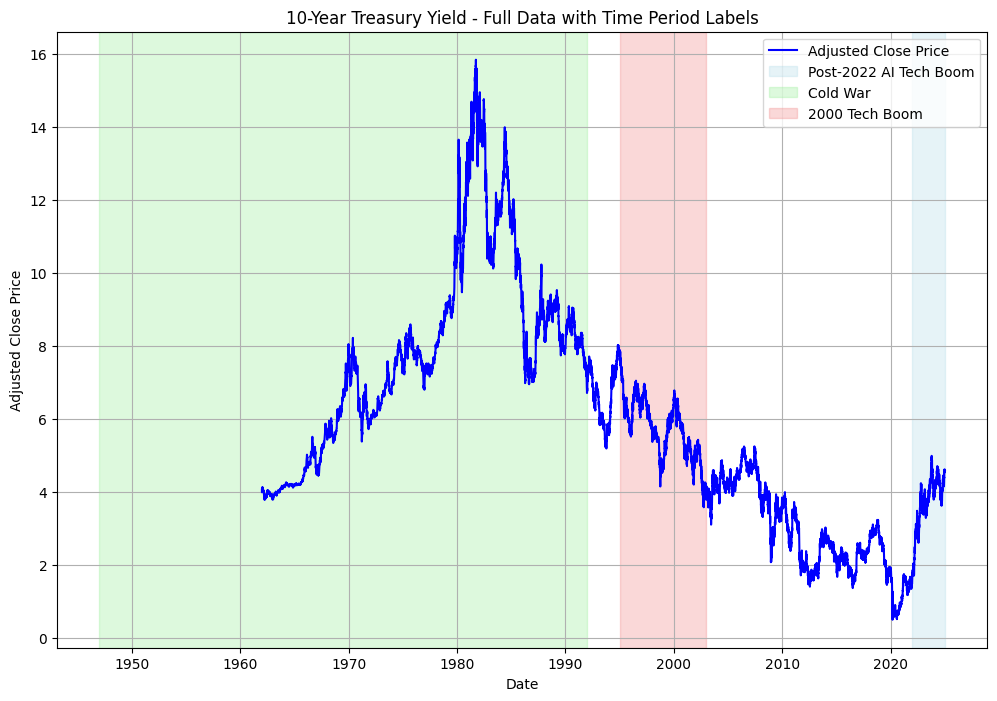

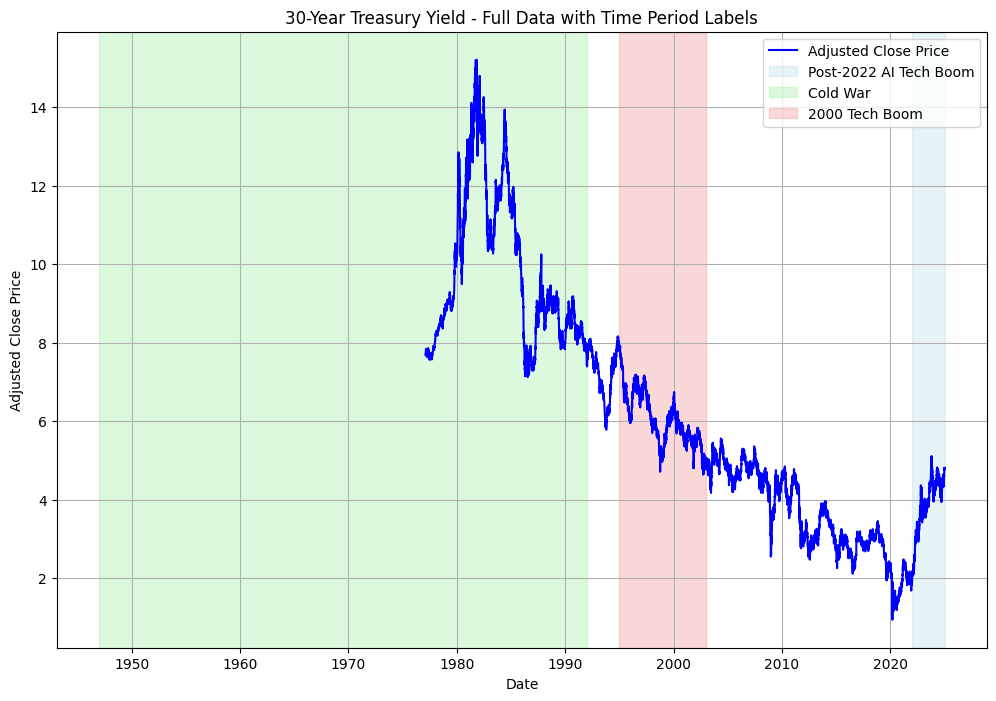

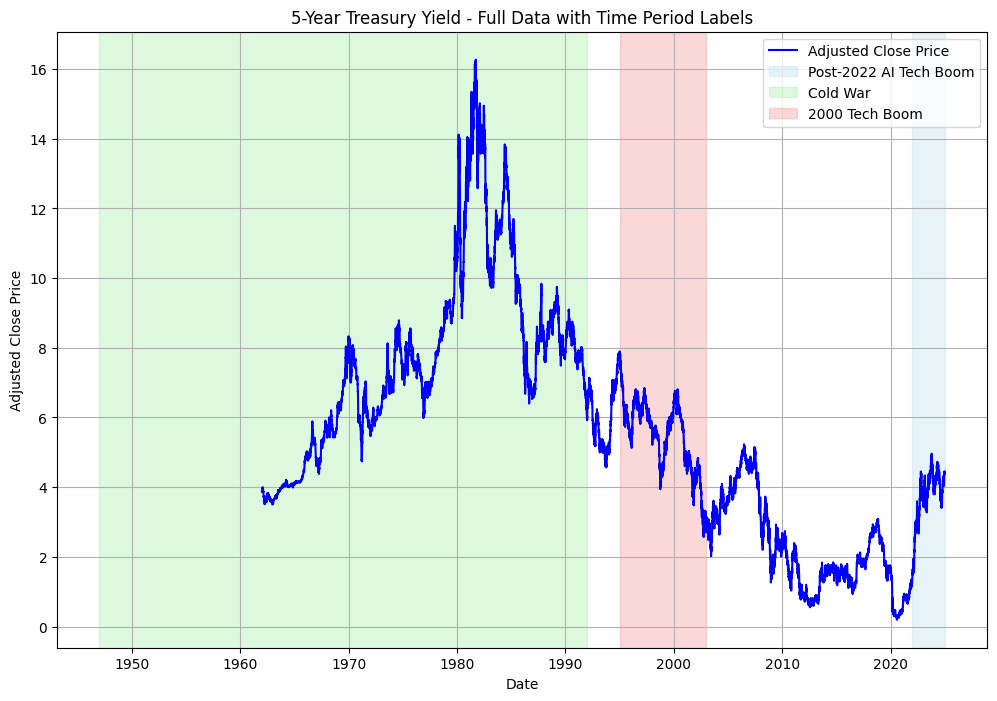

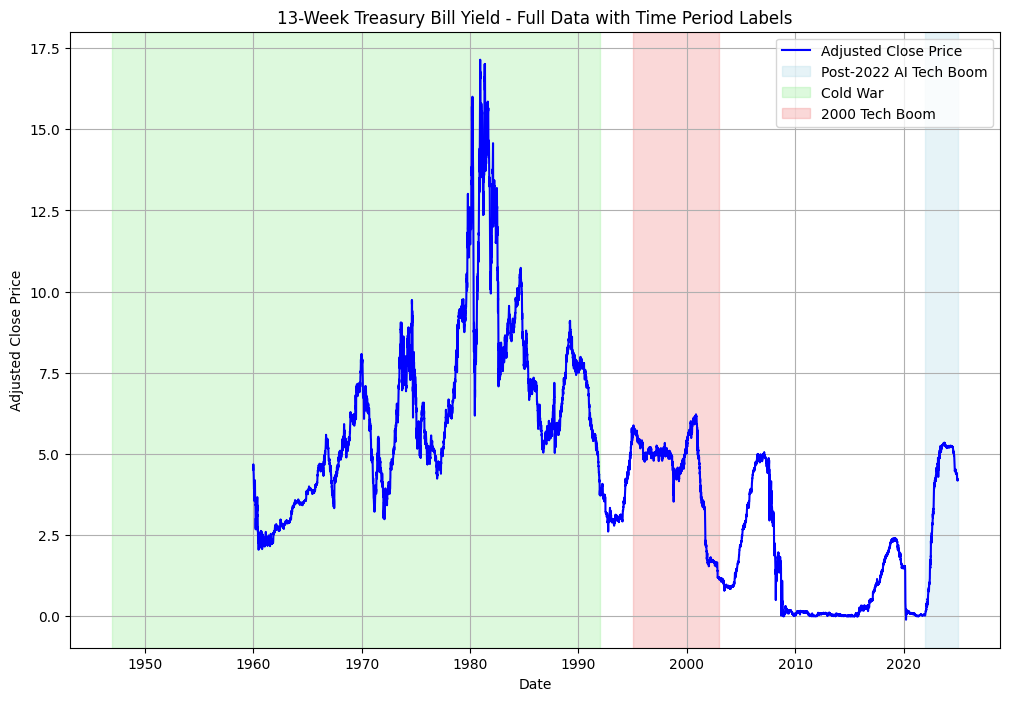

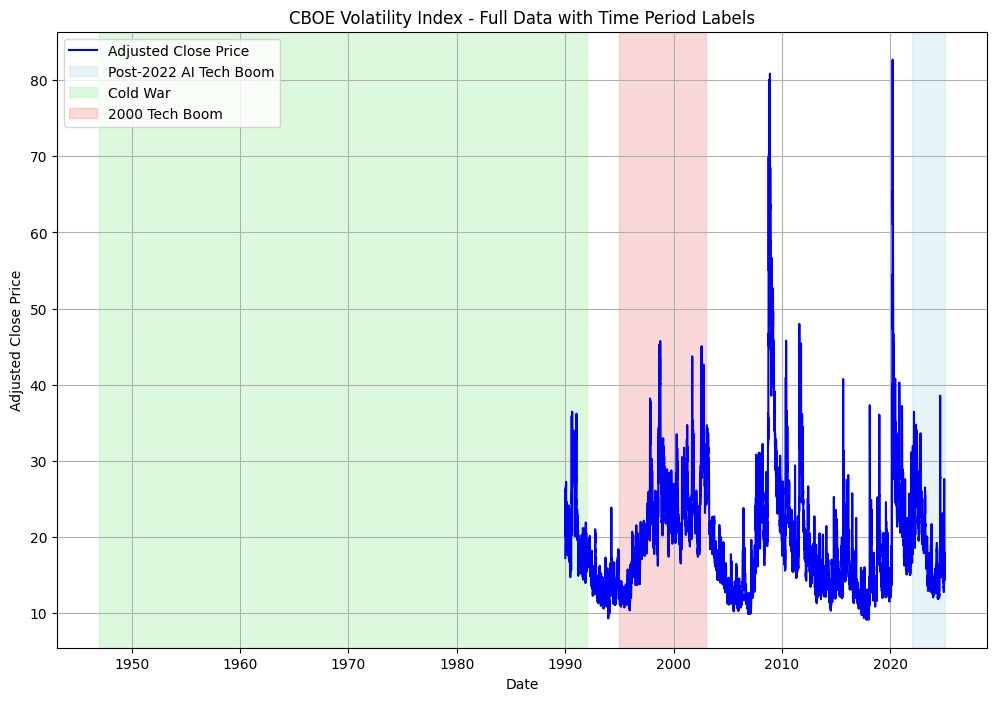

In [2]:
# Define time periods and their corresponding colors
time_periods = {
    "Post-2022 AI Tech Boom": ("2022-01-01", "2025-01-01"),
    "Cold War": ("1947-01-01", "1991-12-31"),
    "2000 Tech Boom": ("1995-01-01", "2002-12-31")
}
time_period_colors = {
    "Post-2022 AI Tech Boom": "lightblue",
    "Cold War": "lightgreen",
    "2000 Tech Boom": "lightcoral"
}

# Function to plot all data for a ticker with time periods labeled and differentiated by color
def plot_ticker_with_time_period_labels(ticker_data, time_periods, ticker_names):
    for ticker, data in ticker_data.items():
        # Reset index and ensure date is properly formatted
        if isinstance(data.index, pd.MultiIndex):
            data = data.reset_index()
        if 'date' in data.columns:
            data['date'] = pd.to_datetime(data['date'], utc=True)  # Ensure timezone-aware datetime
            data.set_index('date', inplace=True)

        plt.figure(figsize=(12, 8))
        # Plot all data for the ticker
        plt.plot(data.index, data['adjclose'], label="Adjusted Close Price", color='blue')

        # Add shaded regions for each time period with different colors
        for period_name, (start_date, end_date) in time_periods.items():
            plt.axvspan(pd.Timestamp(start_date, tz='UTC'), pd.Timestamp(end_date, tz='UTC'),
                        alpha=0.3, color=time_period_colors[period_name], label=period_name)

        # Use the actual name of the ticker in the title
        plt.title(f"{ticker_names[ticker]} - Full Data with Time Period Labels")
        plt.xlabel("Date")
        plt.ylabel("Adjusted Close Price")
        plt.legend(loc="best")
        plt.grid()
        plt.show()

# Example usage with your yahoo_data dictionary and yahoo_tickers mapping
plot_ticker_with_time_period_labels(yahoo_data, time_periods, yahoo_tickers)


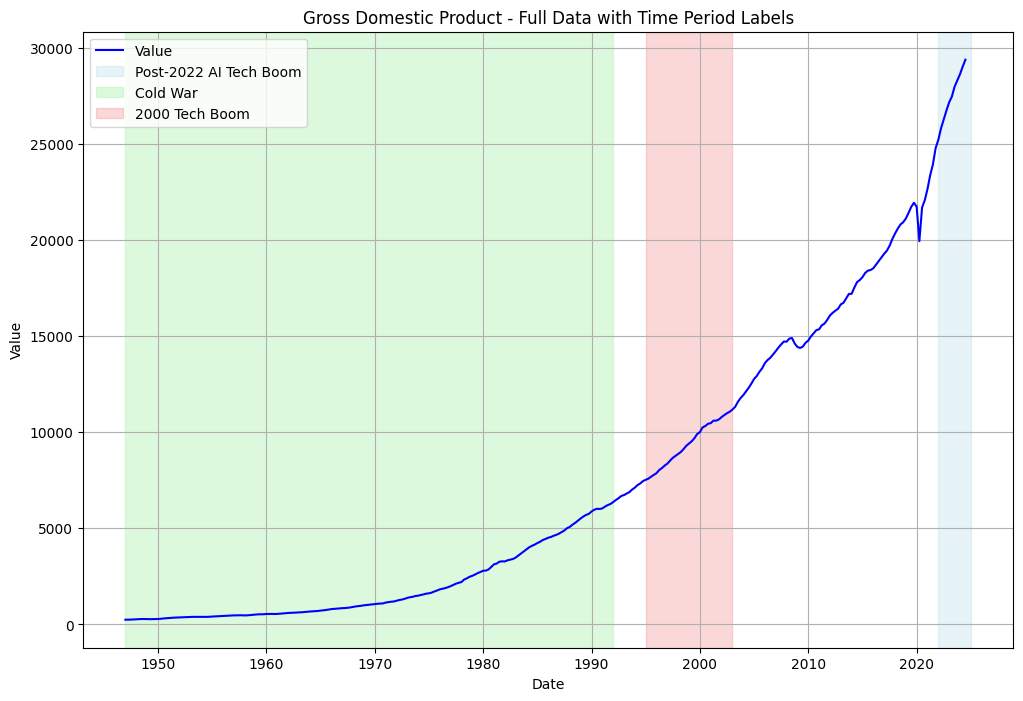

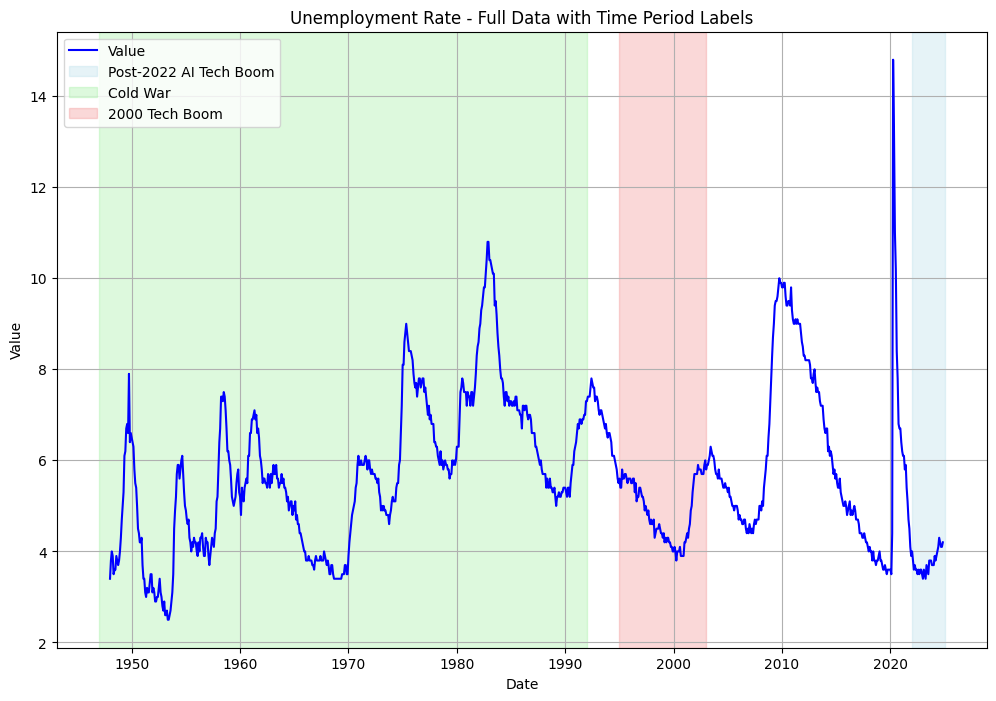

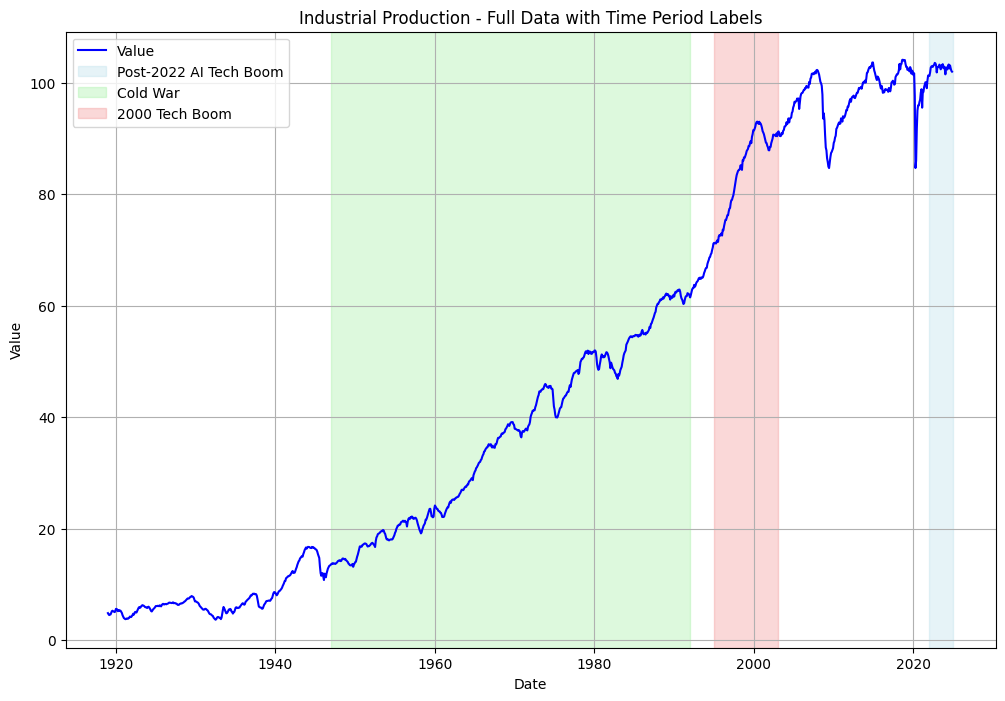

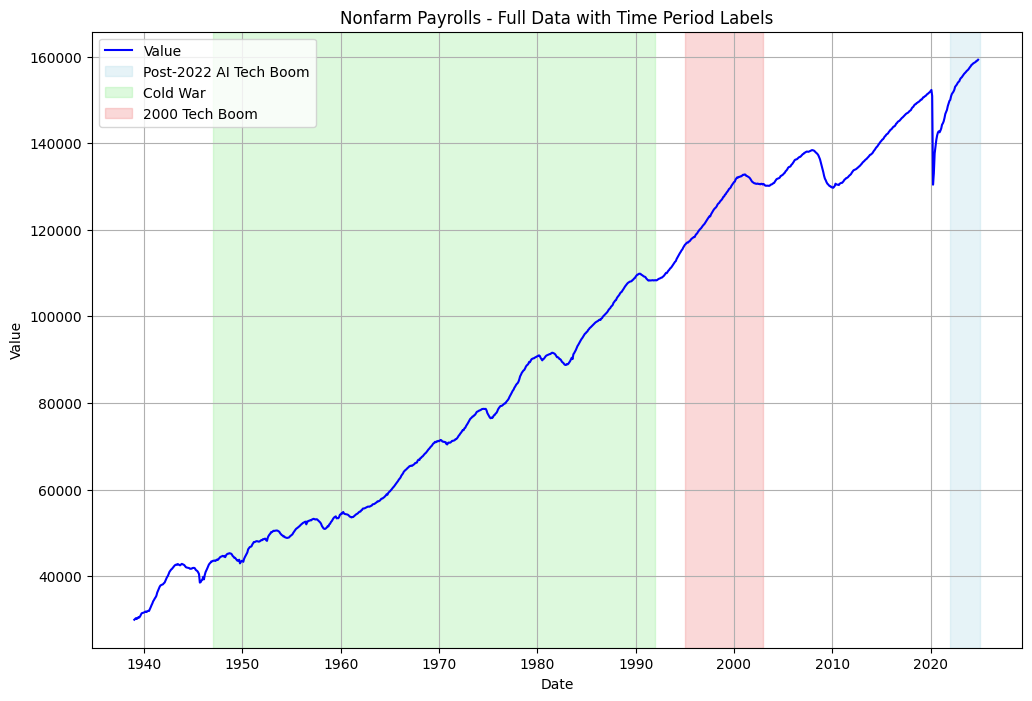

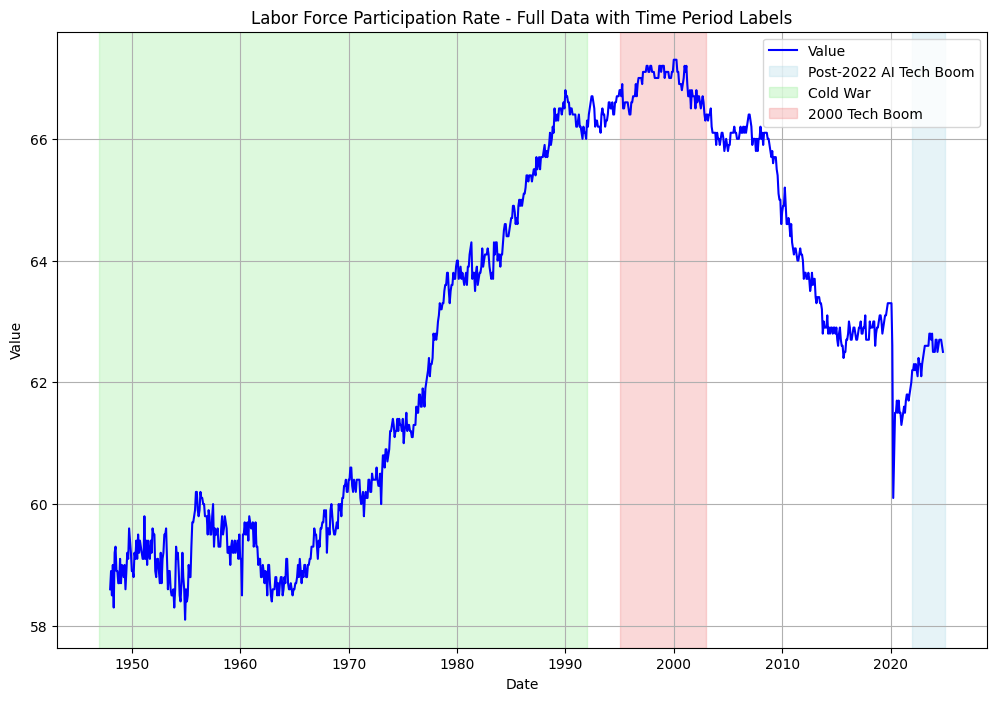

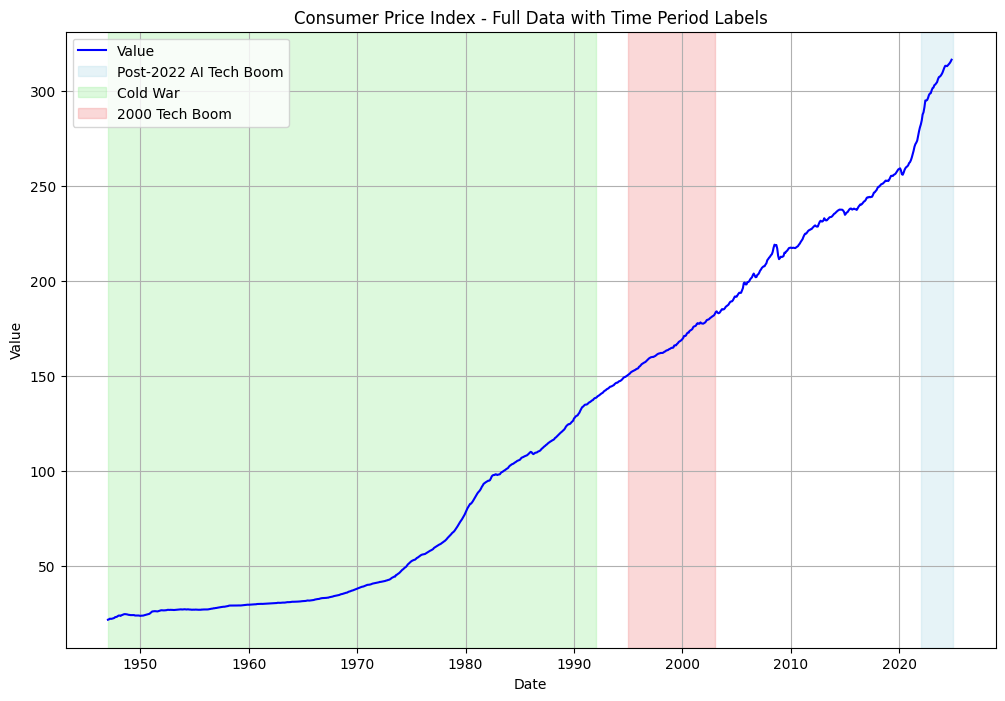

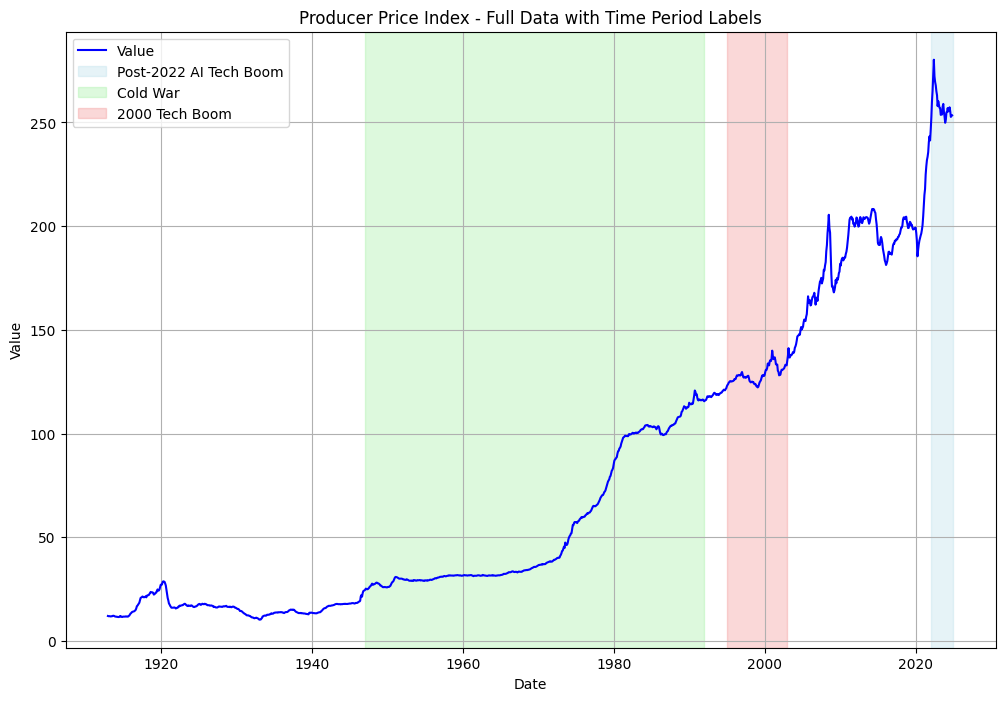

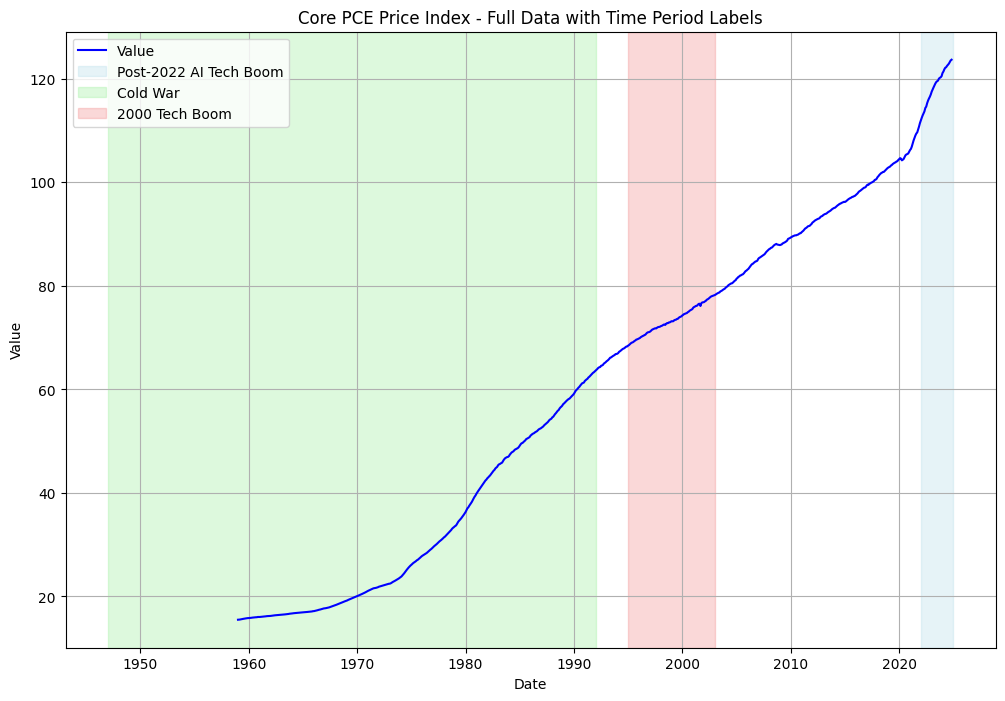

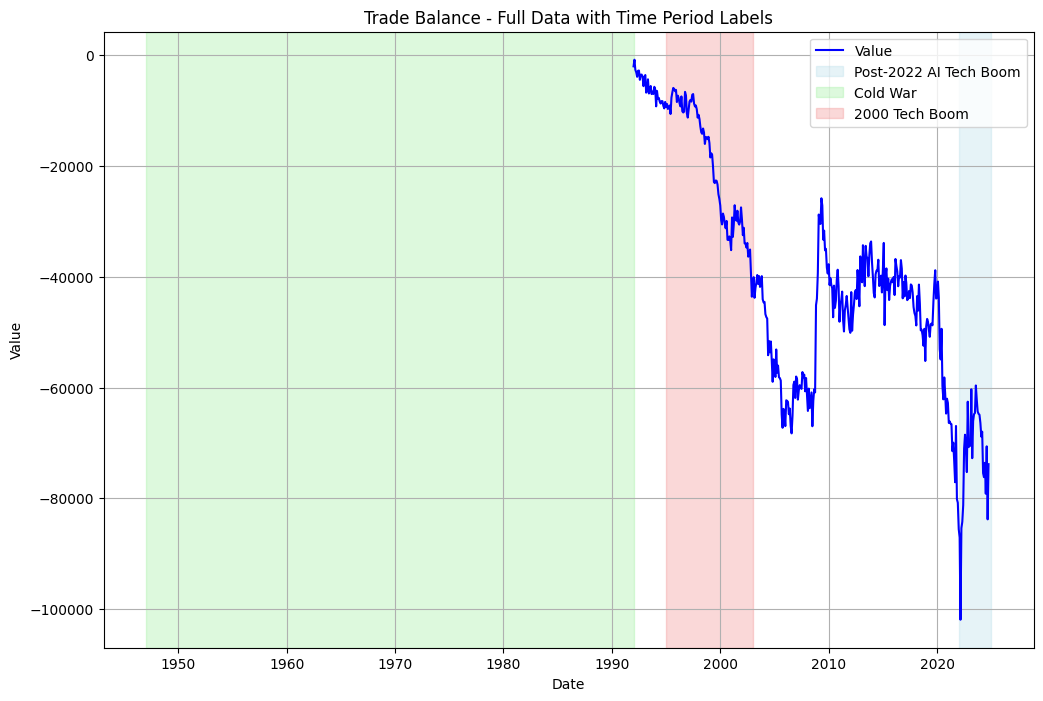

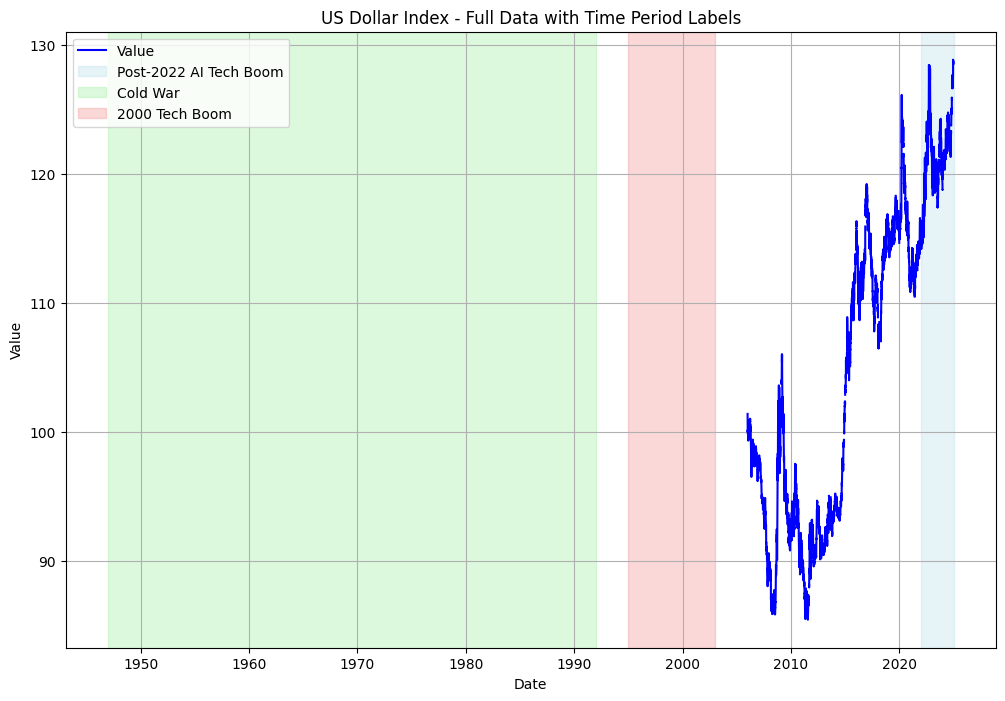

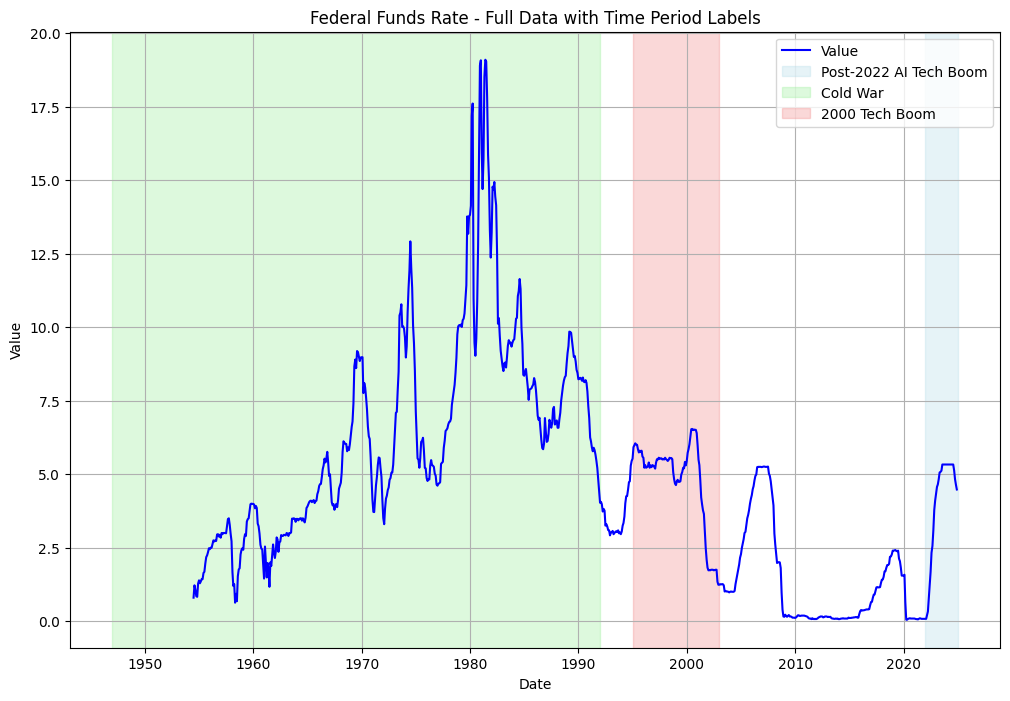

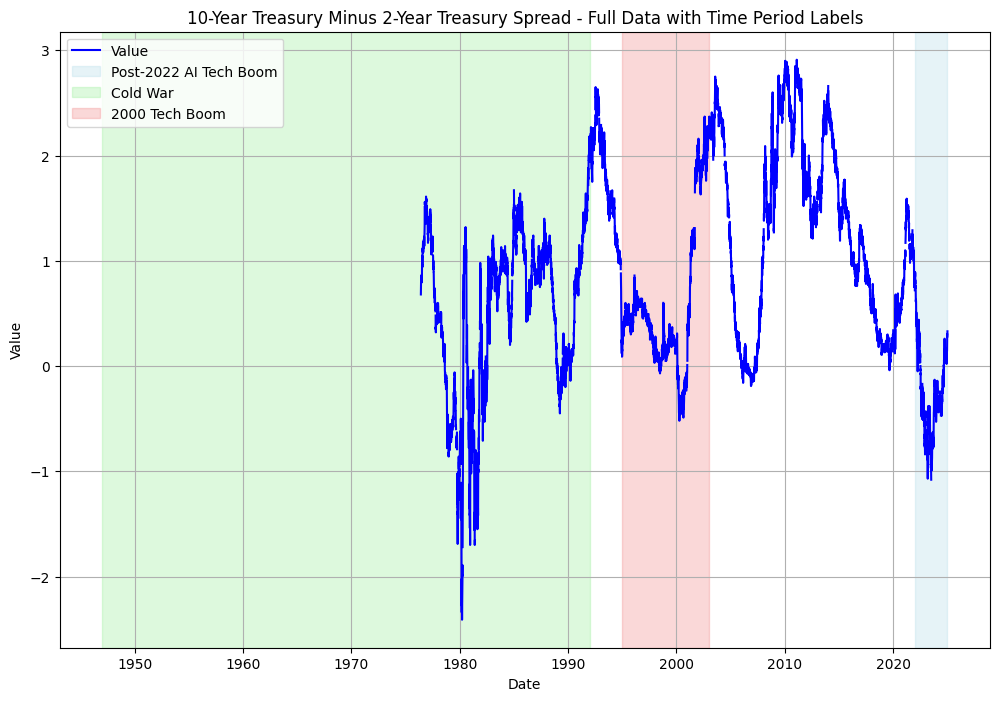

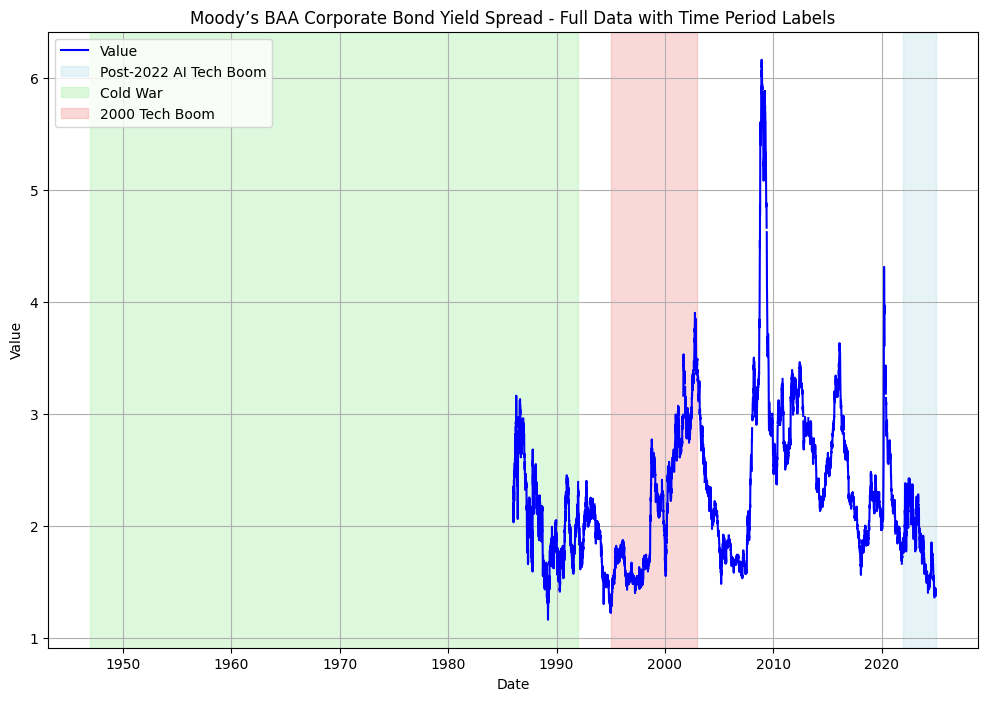

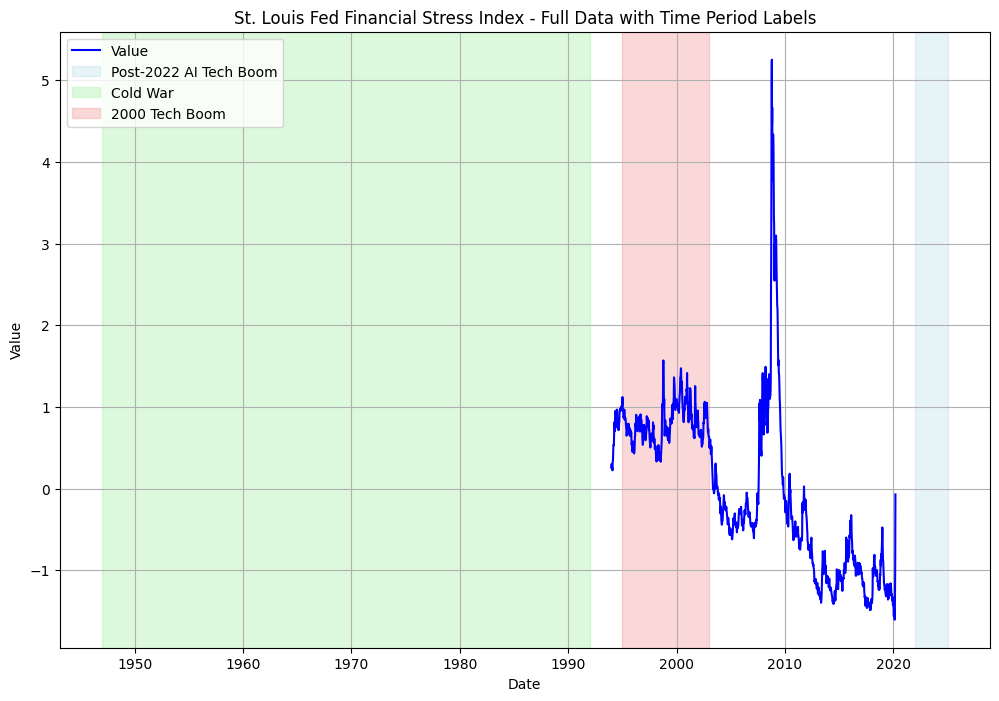

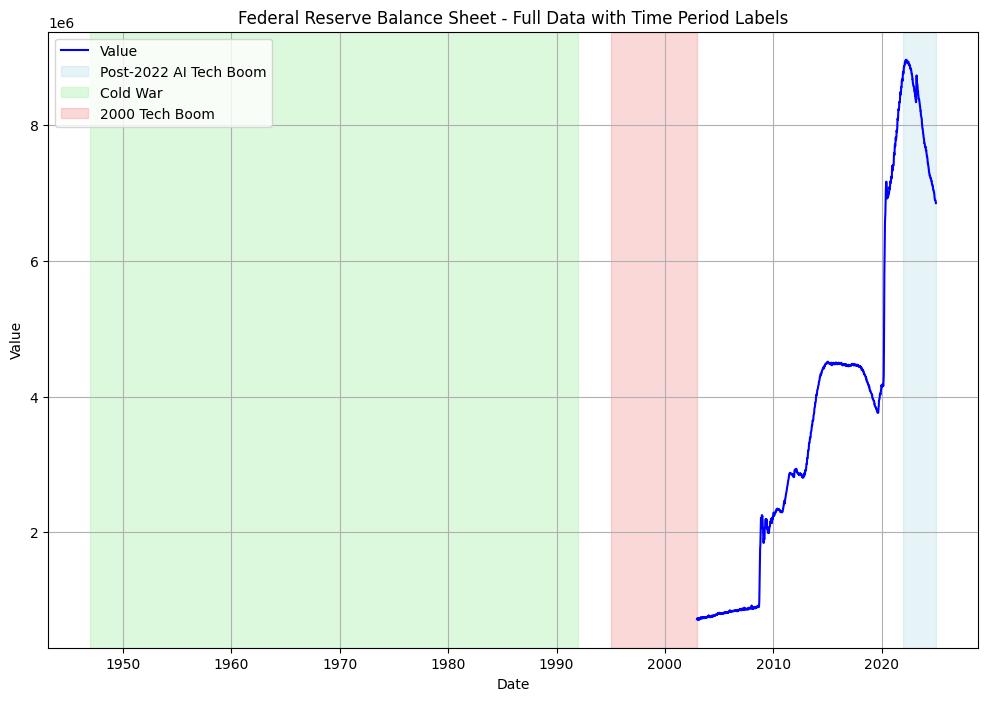

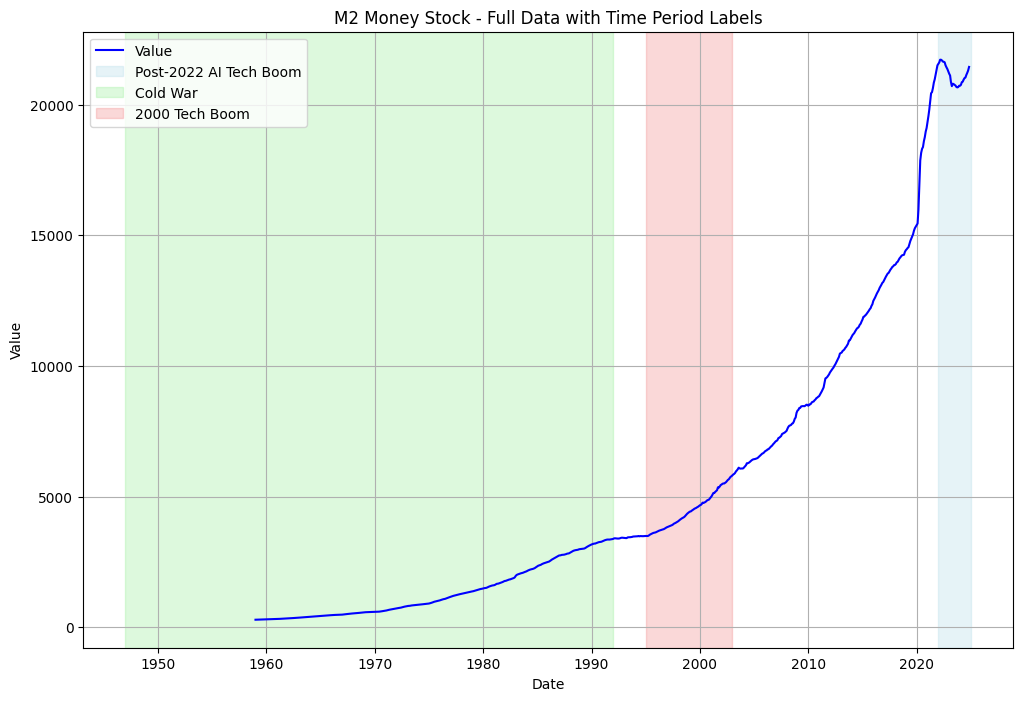

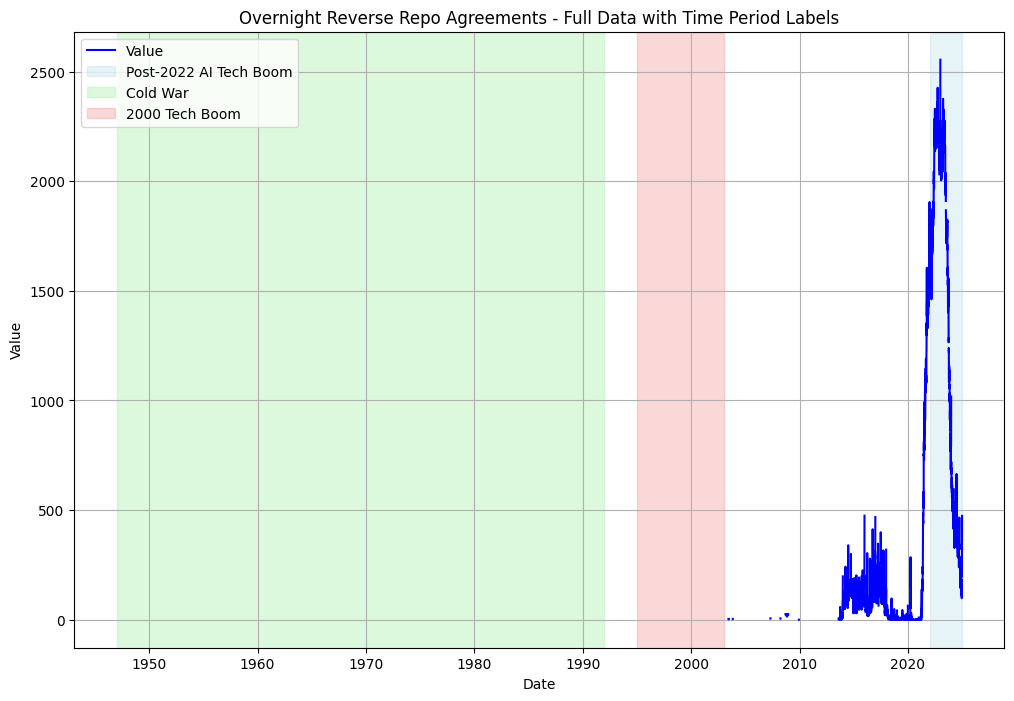

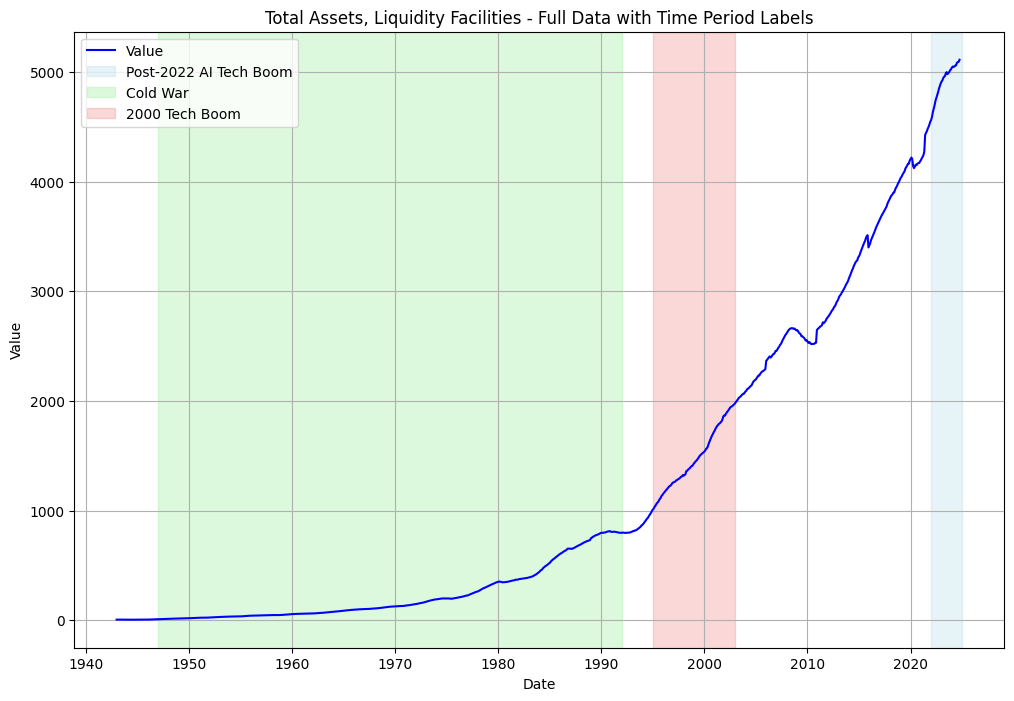

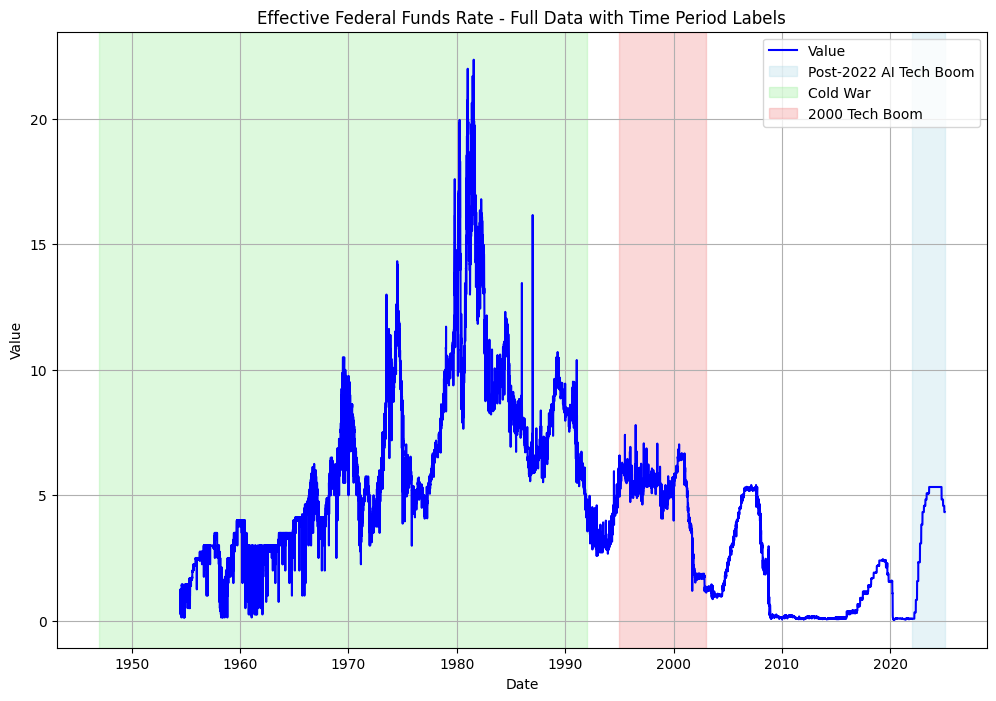

In [3]:
# Function to plot all data for a FRED series with time periods labeled and differentiated by color
def plot_fred_with_time_period_labels(fred_data, time_periods, fred_names):
    for series_id, data in fred_data.items():
        # Reset index and ensure date is properly formatted
        if isinstance(data.index, pd.MultiIndex):
            data = data.reset_index()
        if 'date' in data.columns:
            data['date'] = pd.to_datetime(data['date'], utc=True)  # Ensure timezone-aware datetime
            data.set_index('date', inplace=True)

        plt.figure(figsize=(12, 8))
        # Plot all data for the FRED series
        plt.plot(data.index, data['Value'], label="Value", color='blue')

        # Add shaded regions for each time period with different colors
        for period_name, (start_date, end_date) in time_periods.items():
            plt.axvspan(pd.Timestamp(start_date, tz='UTC'), pd.Timestamp(end_date, tz='UTC'),
                        alpha=0.3, color=time_period_colors[period_name], label=period_name)

        # Use the actual name of the FRED series in the title
        plt.title(f"{fred_names[series_id]} - Full Data with Time Period Labels")
        plt.xlabel("Date")
        plt.ylabel("Value")
        plt.legend(loc="best")
        plt.grid()
        plt.show()

# Example usage with your fred_data dictionary and fred_series mapping
plot_fred_with_time_period_labels(fred_data, time_periods, fred_series)


In [4]:
# Combine Yahoo Finance data into a single DataFrame and save to CSV
if yahoo_data:
    df_yahoo = pd.concat(yahoo_data.values(), ignore_index=False)
    df_yahoo.reset_index(inplace=True)
    df_yahoo.to_csv('yahoo_data.csv', index=False)
else:
    print("No Yahoo Finance data to save.")

# Combine FRED data into a single DataFrame and save to CSV
if fred_data:
    df_fred = pd.concat(fred_data.values(), ignore_index=False)
    df_fred.reset_index(inplace=True)
    df_fred.rename(columns={"index":"date"},inplace=True)
    df_fred.to_csv('fred_data.csv', index=False)
else:
    print("No FRED data to save.")

In [5]:

# Set 'date' as index for easier manipulation
df_yahoo.set_index('date', inplace=True)
df_fred.set_index('date', inplace=True)

# Calculate daily returns for each ticker in df_yahoo (using 'adjclose' column)
tickers = df_yahoo['symbol'].unique()
returns = pd.DataFrame()

for ticker in tickers:
    ticker_data = df_yahoo[df_yahoo['symbol'] == ticker]
    returns[ticker] = ticker_data['adjclose'].pct_change().dropna()

# Display the first few rows of returns
returns.head()


,^GSPC,^N225,^FTSE,^HSI,^TNX,^TYX,^FVX,^IRX,^VIX
date,,,,,,,,,
1942-01-05,0.022497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1942-01-06,-0.004400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1942-01-07,-0.005525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1942-01-08,-0.013333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1942-01-09,-0.003378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


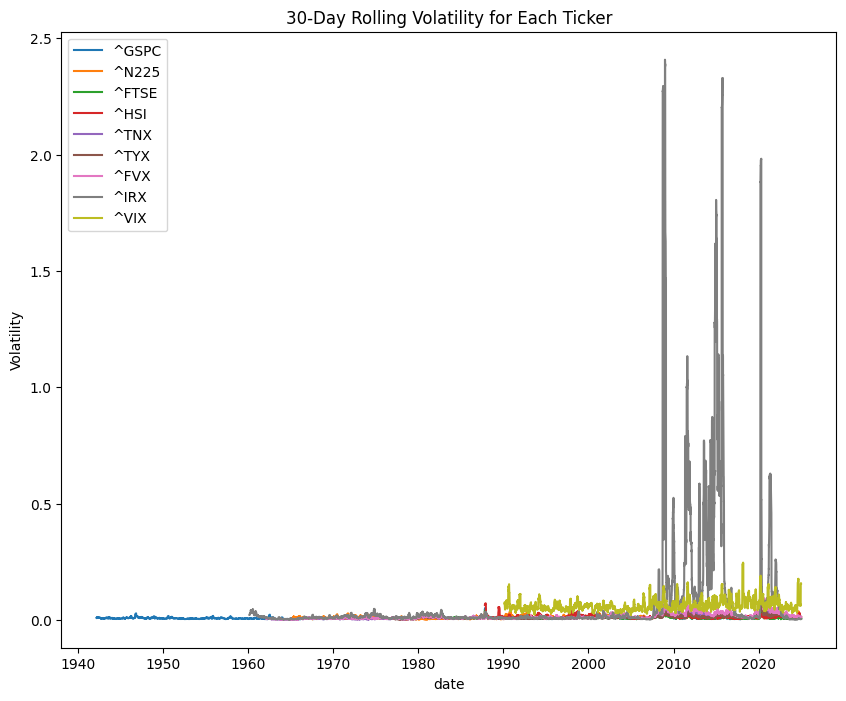

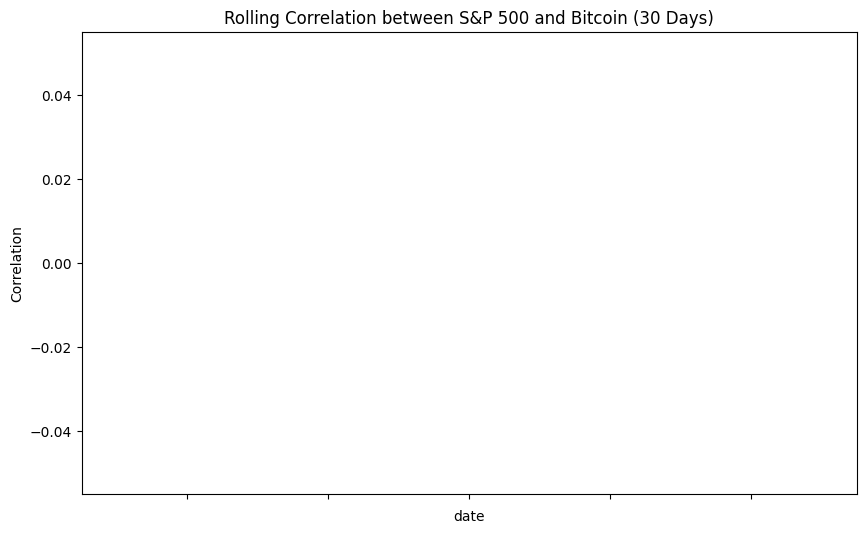

In [6]:
# Calculate rolling volatility (30-day window) for each ticker
rolling_volatility = pd.DataFrame()

for ticker in tickers:
    ticker_data = df_yahoo[df_yahoo['symbol'] == ticker]
    rolling_volatility[ticker] = ticker_data['adjclose'].pct_change().rolling(window=30).std()

# Plot rolling volatility for each ticker
rolling_volatility.plot(figsize=(10, 8))
plt.title('30-Day Rolling Volatility for Each Ticker')
plt.ylabel('Volatility')
plt.legend(tickers)
plt.show()

# Calculate rolling correlations between S&P 500 and Bitcoin, S&P 500 and Oil (assuming 'BTC-USD' and 'CL=F' in data)
sp500_ticker = '^DJI'  # Example ticker for S&P 500
bitcoin_ticker = 'BTC-USD'  # Example ticker for Bitcoin

# Make sure the tickers exist in your df_yahoo and calculate rolling correlation
df_sp500 = df_yahoo[df_yahoo['symbol'] == sp500_ticker]
df_bitcoin = df_yahoo[df_yahoo['symbol'] == bitcoin_ticker]

# Rolling correlation calculation between two tickers (30-day window)
rolling_corr_sp500_bitcoin = df_sp500['adjclose'].rolling(window=30).corr(df_bitcoin['adjclose'])

# Plot rolling correlation
rolling_corr_sp500_bitcoin.plot(figsize=(10, 6), title='Rolling Correlation between S&P 500 and Bitcoin (30 Days)')
plt.ylabel('Correlation')
plt.show()


In [7]:
# Hypothesis: Correlation between Bitcoin (AI-driven market) and Oil (war risk)
bitcoin_ticker = 'BTC-USD'  # Replace with actual Bitcoin ticker
oil_ticker = 'CL=F'  # Replace with actual Oil ticker

# Calculate correlation between Bitcoin and Oil, assuming both are in df_yahoo
df_bitcoin = df_yahoo[df_yahoo['symbol'] == bitcoin_ticker]
df_oil = df_yahoo[df_yahoo['symbol'] == oil_ticker]

# Calculate correlation
corr_bitcoin_oil = df_bitcoin['adjclose'].corr(df_oil['adjclose'])

# Perform correlation test between S&P 500 and VIX (market sentiment)
sp500_ticker = '^DJI'  # Replace with actual S&P 500 ticker
vix_ticker = '^VIX'  # Replace with actual VIX ticker

df_sp500 = df_yahoo[df_yahoo['symbol'] == sp500_ticker]
df_vix = df_yahoo[df_yahoo['symbol'] == vix_ticker]

corr_sp500_vix = df_sp500['adjclose'].corr(df_vix['adjclose'])

# Print correlation results
print(f"Correlation between Bitcoin and Oil: {corr_bitcoin_oil}")
print(f"Correlation between S&P 500 and VIX: {corr_sp500_vix}")


Correlation between Bitcoin and Oil: nan
Correlation between S&P 500 and VIX: nan


### Need to add implied vol options data predicions on spy for forecasts

Multiple hypotheses you could test for the given research using the data and context you’ve provided:

### 1. **Impact of Geopolitical Risk on Market Performance**
   **Hypothesis:** Geopolitical conflicts (such as wars) negatively impact market performance in the short term, but the effect diminishes as investors anticipate long-term stability.
   - **Testable questions:**
     - Does the S&P 500 index show significant negative returns during the start of major geopolitical conflicts (e.g., Russia-Ukraine, Iran-Israel, etc.)?
     - Does the market recover faster when the geopolitical risks are perceived to be less imminent?
     - Use **S&P 500 (GSPC)** and **VIX** to measure short-term volatility and the recovery of equity markets.
   
### 2. **Effect of Nuclear War Risk on Market Sentiment**
   **Hypothesis:** The perceived risk of nuclear war raises market volatility and leads to a decline in market indices (e.g., S&P 500), as well as commodity price increases (gold, oil).
   - **Testable questions:**
     - Does the market react to nuclear conflict risk differently than to conventional wars?
     - Are commodities such as **gold (GC=F)** and **crude oil (CL=F)** negatively correlated with S&P 500 during heightened nuclear war risk?
     - Analyze the relationship between **VIX** and major equity indices during spikes in geopolitical tensions (e.g., during North Korea’s nuclear tests).

### 3. **AI's Economic Impact Outweighs War Risks**
   **Hypothesis:** AI-driven technological growth (e.g., tech stocks driven by ChatGPT-like advancements) continues to propel markets, even amid increasing geopolitical tensions.
   - **Testable questions:**
     - How does AI-related growth in the tech sector (e.g., **Nikkei 225 (N225)** and **S&P 500**) compare with periods of heightened geopolitical risk?
     - Is there a positive correlation between major tech stock price increases and developments in AI during periods of war risks (use **NVIDIA (NVDA)** or similar stocks)?
     - Measure the **returns of tech indices (e.g., NASDAQ)** versus **S&P 500** during high-risk geopolitical events.
   
### 4. **Market Responses to War Risks**
   **Hypothesis:** Cryptocurrency markets (e.g., Bitcoin) respond more sensitively to geopolitical risks than traditional markets (S&P 500, Dow Jones).
   - **Testable questions:**
     - Does **Bitcoin (BTC-USD)** experience sharp declines when geopolitical conflicts intensify, particularly during events such as drone attacks or border escalations?
     - Is there a divergence between traditional equity market performance (e.g., **S&P 500**) and Bitcoin performance during the onset of geopolitical tensions?
     - Use **VIX** and **Bitcoin volatility** to assess the risk perception differences between traditional markets and cryptocurrencies.

### 5. **AI-Driven Tech Boom vs. War Impact on Market Growth**
   **Hypothesis:** AI-driven tech boom leads to stronger market growth than geopolitical risks, with the S&P 500 and related indices reflecting the optimism in the tech sector.
   - **Testable questions:**
     - How do the returns of tech-heavy indices (e.g., **NASDAQ**, **S&P 500** tech stocks) compare to commodity or bond indices during periods of geopolitical conflict?
     - Does the increase in AI stocks (e.g., **Microsoft, NVIDIA**) coincide with a reduction in market sensitivity to geopolitical tensions?
     - Measure the correlation between **S&P 500** and **Bitcoin** during periods of both AI booms and geopolitical tensions.

### 6. **Comparison of Current Periods with Tech Boom and Cold War**
   **Hypothesis:** The current market conditions show patterns similar to those observed during the 2000 tech boom and the Cold War era, with unique effects from AI.
   - **Testable questions:**
     - Are current market returns more similar to the **2000 Tech Boom** or the **Cold War** in terms of volatility, sector performance, and the influence of geopolitical risk?
     - Compare **S&P 500** performance during the **Cold War period (1947-1991)** with current market periods.
     - Analyze the role of technology stocks in the **2000 Tech Boom** and compare them to current AI-driven stock performance.

### 7. **AI Impact on Inflation and Employment Amid War Risks**
   **Hypothesis:** AI-related productivity gains offset inflationary pressures and prevent large-scale unemployment during periods of geopolitical conflict.
   - **Testable questions:**
     - How do employment numbers (**PAYEMS**) and inflation rates (**CPIAUCSL**) compare during times of heightened geopolitical tensions and during periods of rapid technological advancement?
     - Does AI growth correlate with improvements in productivity, countering the negative impact of war on GDP growth (**GDP**)?
     - Use **GDP** and **Unemployment Rate (UNRATE)** to analyze the combined effects of AI and geopolitical risks on macroeconomic indicators.

### 8. **Effectiveness of AI in Mitigating Risk Premium in War Periods**
   **Hypothesis:** AI helps reduce the risk premium demanded by investors during war periods, reflected by lower risk-free rates and bond yields.
   - **Testable questions:**
     - Does the **Federal Funds Rate (FEDFUNDS)** decrease during periods of AI growth despite increased geopolitical risks?
     - How do bond yields (**10-Year Treasury Yield - ^TNX**) behave in relation to geopolitical tensions and AI-driven growth in the market?
     - Compare **Corporate Bond ETFs (LQD, HYG)** performance during periods of geopolitical instability, contrasting with **S&P 500**.

### 9. **Market’s Pricing of War and AI Risks**
   **Hypothesis:** The market prices in geopolitical risks differently depending on AI sector growth, with AI-driven optimism absorbing some of the risks typically priced into equities during conflict periods.
   - **Testable questions:**
     - How do risk premiums (as reflected in **VIX**, **10-Year Treasury Yield**) behave during high geopolitical risk periods, especially when AI tech stocks perform well?
     - Does market volatility (measured by **VIX**) rise less during war periods when AI stocks are growing rapidly?

### Data Analysis Plan:
- **Time Series Analysis:** Use rolling windows to calculate the **volatility (VIX)**, **returns** for indices like **S&P 500** (GSPC), **Bitcoin** (BTC-USD), and commodities to understand the relationship between AI growth and geopolitical risks.
- **Event Study Analysis:** Focus on specific geopolitical events and AI product launches to measure stock price movements, volatility, and sentiment shifts.
- **Cross-Country Comparisons:** Compare market responses in countries with differing levels of exposure to geopolitical risks (e.g., **US** vs **Iran**).

### Key Variables:
- **Equity Indices (e.g., S&P 500, Dow Jones)**: To analyze overall market performance.
- **Volatility Index (VIX)**: To measure market risk perceptions.
- **Cryptocurrency Performance (Bitcoin)**: To measure alternative market reactions to geopolitical risks.
- **Treasury Yields (TNX, TYX)**: To measure market sentiment on risk-free assets.
- **Commodities (Gold, Oil)**: To capture investor risk aversion during geopolitical crises.
- **Macroeconomic Indicators (GDP, Unemployment, CPI)**: To analyze the broader economic impact of AI and war risks.

These hypotheses provide a comprehensive framework for testing the impact of AI and geopolitical risks on markets using the given data sources.

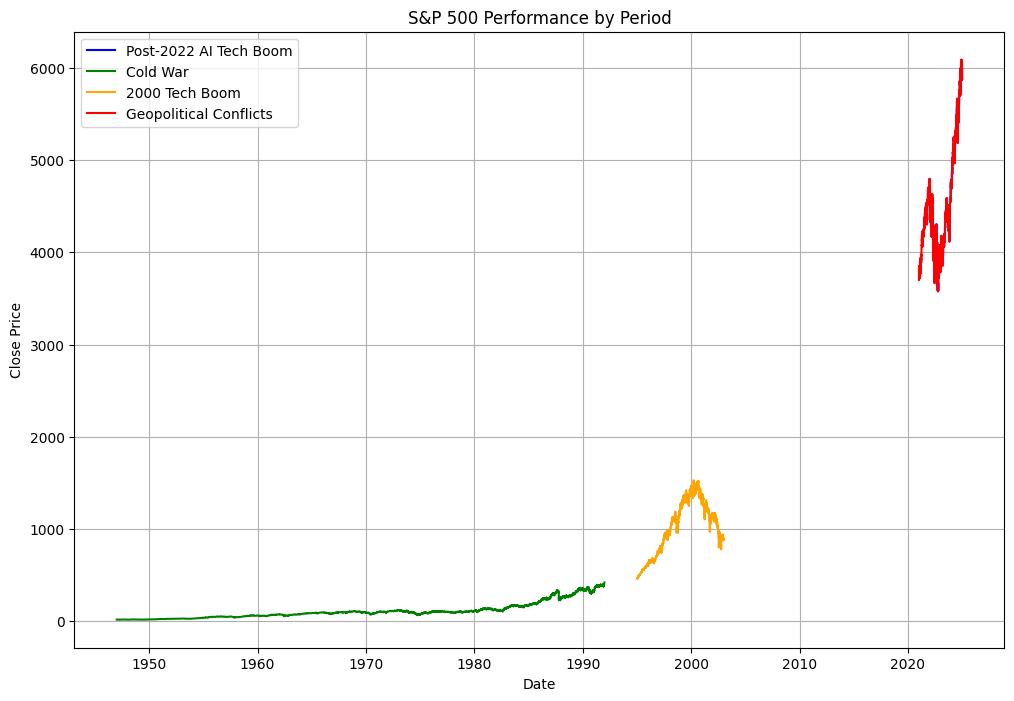

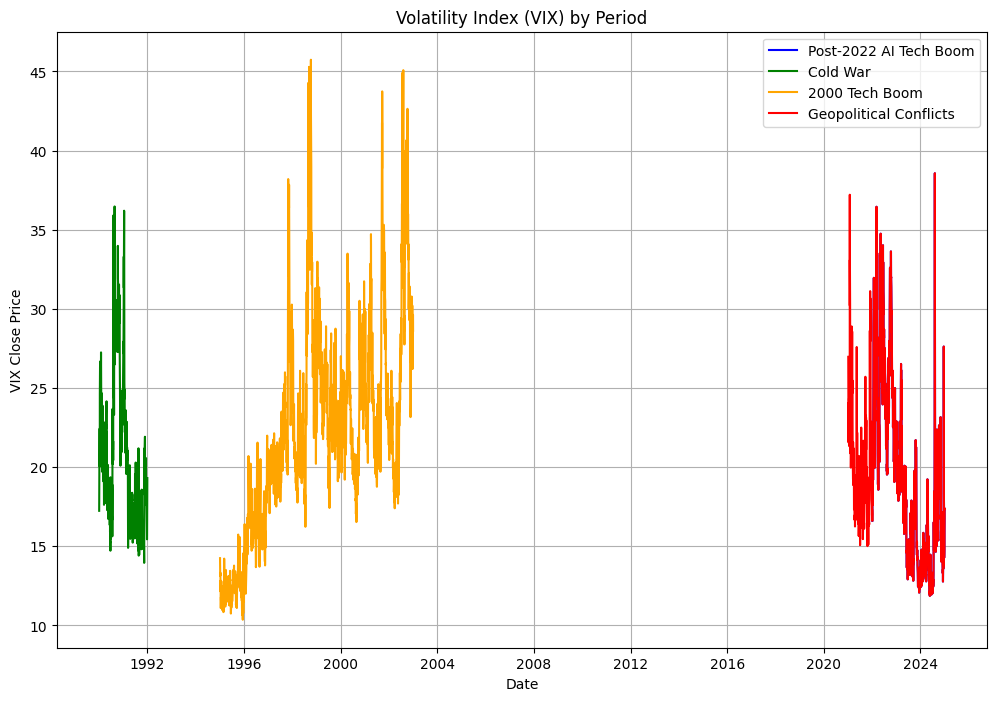

KeyError: 'BTC-USD'

In [8]:
 # Define time periods and their corresponding colors
time_periods = {
    "Post-2022 AI Tech Boom": ("2022-01-01", "2025-01-01"),
    "Cold War": ("1947-01-01", "1991-12-31"),
    "2000 Tech Boom": ("1995-01-01", "2002-12-31"),
    "Geopolitical Conflicts": ("2021-01-01", "2025-01-01"),
}

# Define colors for each period
period_colors = {
    "Post-2022 AI Tech Boom": "blue",
    "Cold War": "green",
    "2000 Tech Boom": "orange",
    "Geopolitical Conflicts": "red",
}

# Example: Plot S&P 500 performance during each period
def plot_index_by_period(data, ticker="^GSPC"):
    index_data = data[ticker]
    index_data = index_data.reset_index()
    index_data['Date'] = pd.to_datetime(index_data['date'])

    plt.figure(figsize=(12, 8))
    for period, (start, end) in time_periods.items():
        period_data = index_data[(index_data['Date'] >= start) & (index_data['Date'] <= end)]
        plt.plot(period_data['Date'], period_data['close'], label=period, color=period_colors[period])

    plt.title(f"{yahoo_tickers[ticker]} Performance by Period")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.legend()
    plt.grid()
    plt.show()

# Example: Compare volatility (VIX) during periods of geopolitical conflict
def compare_volatility(data, ticker="^VIX"):
    vix_data = data[ticker]
    vix_data = vix_data.reset_index()
    vix_data['Date'] = pd.to_datetime(vix_data['date'])

    plt.figure(figsize=(12, 8))
    for period, (start, end) in time_periods.items():
        period_data = vix_data[(vix_data['Date'] >= start) & (vix_data['Date'] <= end)]
        plt.plot(period_data['Date'], period_data['close'], label=period, color=period_colors[period])

    plt.title("Volatility Index (VIX) by Period")
    plt.xlabel("Date")
    plt.ylabel("VIX Close Price")
    plt.legend()
    plt.grid()
    plt.show()

# Example: Correlation between Bitcoin and S&P 500 during geopolitical conflicts
def analyze_crypto_vs_equity(data, crypto_ticker="BTC-USD", equity_ticker="^GSPC"):
    crypto_data = data[crypto_ticker].reset_index()
    equity_data = data[equity_ticker].reset_index()

    crypto_data['Date'] = pd.to_datetime(crypto_data['date'])
    equity_data['Date'] = pd.to_datetime(equity_data['date'])

    merged_data = pd.merge(
        crypto_data[['Date', 'close']],
        equity_data[['Date', 'close']],
        on="Date",
        suffixes=("_crypto", "_equity"),
    )

    plt.figure(figsize=(12, 8))
    plt.plot(merged_data['Date'], merged_data['close_crypto'], label="Bitcoin", color="orange")
    plt.plot(merged_data['Date'], merged_data['close_equity'], label="S&P 500", color="blue")
    plt.title("Bitcoin vs S&P 500 Performance During Geopolitical Conflicts")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.legend()
    plt.grid()
    plt.show()

    # Calculate and display correlation
    correlation = merged_data['close_crypto'].corr(merged_data['close_equity'])
    print(f"Correlation between Bitcoin and S&P 500: {correlation:.2f}")

# Call the functions to analyze and visualize
plot_index_by_period(yahoo_data)
compare_volatility(yahoo_data)
analyze_crypto_vs_equity(yahoo_data)
